# Validation croisée (cross-validation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import des bases sur le vin
reds = pd.read_csv('winequality-red.csv',sep=";")
reds["color"]='red'
whites = pd.read_csv('winequality-white.csv', sep=";")
whites["color"] = 'white'
wines = pd.concat([reds,whites],axis=0)
wines.reset_index(drop=True, inplace=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# Matrice X et vecteur y : on va essayer de prédire la qualité d'un vin
X = wines.drop(['quality', 'color'], axis=1)
y = wines['quality']

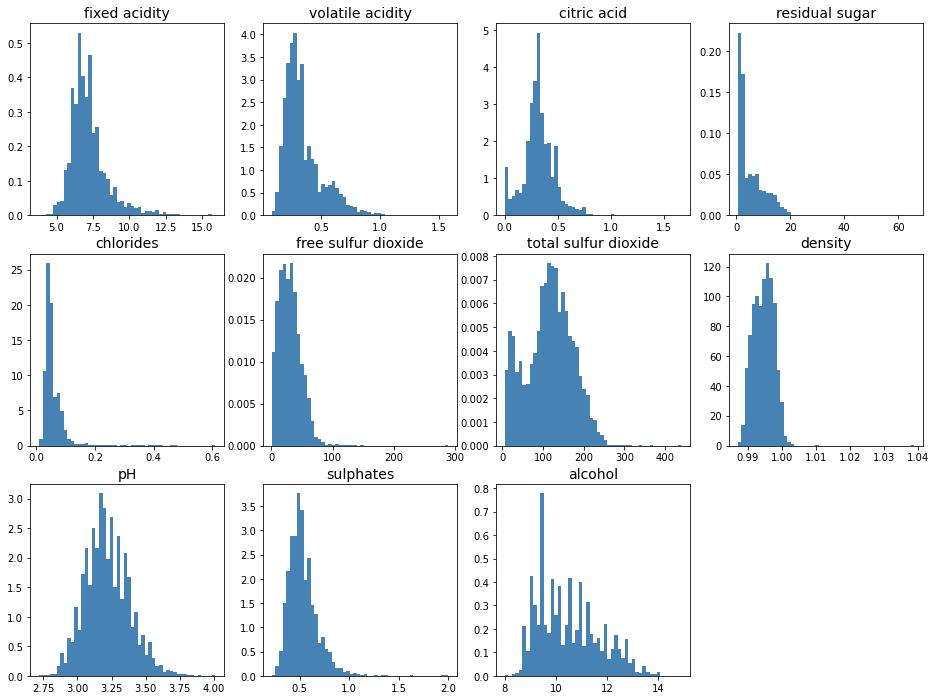

In [4]:
# Affichage des histogrammes des variables
fig = plt.figure(figsize=(16, 12))
for i in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (i+1))
    ax.hist(X.iloc[:, i], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(wines.columns[i], fontsize=14)

On va discrétiser la variable Y pour avoir un problème de classification : les vins classés "bons", "biens" et ceux classés "bofs".

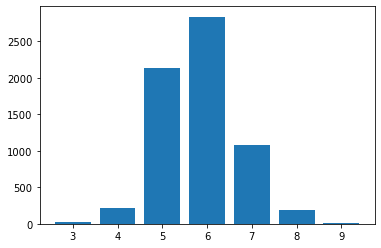

In [5]:
vals = wines["quality"].value_counts()
vals
plt.bar(vals.index,vals);

Vu la répartition, on va faire 3 classes :
- bons : notes 7, 8 et 9
- biens : note 6
- bofs : notes 3, 4 et 5

In [6]:
y_class = np.where(y==6,1,0)
y_class[np.where(y>6)] = 2

for k in range(3):
    print(k , (y_class==k).sum())


0 2384
1 2836
2 1277


In [7]:
#Train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_class,test_size=0.3)

In [8]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors': list(range(1,8)), 'p':[1,2,3]}


# GridSearchCV : création de modèle avec recherche d'hyperparamètre par validation croisée
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn.fit(X_train, y_train)

knn.cv_results_

{'mean_fit_time': array([0.00337238, 0.00277324, 0.00296512, 0.00308232, 0.00325403,
        0.00314922, 0.00297341, 0.00294523, 0.00312719, 0.00323648,
        0.00291939, 0.00339751, 0.00316048, 0.00300641, 0.0032371 ,
        0.00293684, 0.00292044, 0.00312667, 0.00290437, 0.00305738,
        0.00314264]),
 'std_fit_time': array([1.09080690e-03, 4.56017901e-05, 2.97917027e-04, 2.15201285e-04,
        4.49199398e-04, 1.77783182e-04, 2.22117873e-04, 1.54085514e-04,
        3.31911361e-04, 3.88994898e-04, 1.23030770e-04, 4.75972474e-04,
        3.72094064e-04, 2.85147919e-04, 2.48457080e-04, 1.26807758e-04,
        1.24995419e-04, 4.06563687e-04, 7.88813769e-05, 2.56272252e-04,
        3.62328736e-04]),
 'mean_score_time': array([0.04446101, 0.02934241, 0.13258533, 0.05575213, 0.04652667,
        0.18826861, 0.05824003, 0.03898325, 0.2054635 , 0.06214337,
        0.04132023, 0.21585317, 0.06144543, 0.04203219, 0.23793464,
        0.06265569, 0.04473062, 0.24362831, 0.06719599, 0.047207

In [10]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(knn.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        knn.cv_results_['mean_test_score'], # score moyen
        knn.cv_results_['std_test_score'],  # écart-type du score
        knn.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("'accuracy' = {:.3f} (+/-{:.03f}) for {}".format(mean,std*2,params))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 1, 'p': 1}
Résultats de la validation croisée :
'accuracy' = 0.642 (+/-0.012) for {'n_neighbors': 1, 'p': 1}
'accuracy' = 0.630 (+/-0.028) for {'n_neighbors': 1, 'p': 2}
'accuracy' = 0.629 (+/-0.016) for {'n_neighbors': 1, 'p': 3}
'accuracy' = 0.603 (+/-0.014) for {'n_neighbors': 2, 'p': 1}
'accuracy' = 0.601 (+/-0.025) for {'n_neighbors': 2, 'p': 2}
'accuracy' = 0.599 (+/-0.016) for {'n_neighbors': 2, 'p': 3}
'accuracy' = 0.591 (+/-0.032) for {'n_neighbors': 3, 'p': 1}
'accuracy' = 0.595 (+/-0.031) for {'n_neighbors': 3, 'p': 2}
'accuracy' = 0.593 (+/-0.026) for {'n_neighbors': 3, 'p': 3}
'accuracy' = 0.604 (+/-0.038) for {'n_neighbors': 4, 'p': 1}
'accuracy' = 0.607 (+/-0.028) for {'n_neighbors': 4, 'p': 2}
'accuracy' = 0.605 (+/-0.016) for {'n_neighbors': 4, 'p': 3}
'accuracy' = 0.591 (+/-0.028) for {'n_neighbors': 5, 'p': 1}
'accuracy' = 0.597 (+/-0.035) for {'n_neighbors': 5, 'p': 2}
'accuracy' = 0.596 (+/-0.

In [11]:
knn.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

In [12]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("\nSur le jeu de test : {:.3f}".format(accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.656
